In [63]:
import numpy as np 
import pandas as pd 
import os
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [64]:
HappinessSurvey2015 = pd.read_csv('2015.csv')
HappinessSurvey2016 = pd.read_csv('2016.csv')
HappinessSurvey2017 = pd.read_csv('2017.csv')

#Dataset is from the World Happiness Report using 2015, 2016, 2017 reports

In [65]:
columns_2015 = ['Region', 'Standard Error']
columns_dropped_2015 = HappinessSurvey2015.drop(columns_2015, axis=1)

#Drop unnecessary columns from 2015 dataset

In [66]:
columns_dropped_2015.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [67]:
HappinessSurvey2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [68]:
columns_2016 = ['Region', 'Lower Confidence Interval', 'Upper Confidence Interval']
columns_dropped_2016 = HappinessSurvey2016.drop(columns_2016, axis=1)

#Drop unnecessary columns from 2016 dataset

In [11]:
columns_dropped_2016.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [69]:
HappinessSurvey2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [70]:
columns_2017 = ['Whisker.high', 'Whisker.low']
columns_dropped_2017 = HappinessSurvey2017.drop(columns_2017, axis=1)

#Drop unnecessary columns from 2017 dataset

In [71]:
columns_dropped_2017.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [72]:
columns_dropped_2015.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

#standardize names for 2015 dataset

In [73]:
columns_dropped_2016.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

#standardize names for 2016 dataset

In [74]:
columns_dropped_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

#standardize names for 2017 dataset

In [75]:
frames = [columns_dropped_2015, columns_dropped_2016, columns_dropped_2017]
happiness = pd.concat(frames)

#concatenate datasets 

In [76]:
happiness.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [77]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 10 columns):
Country              470 non-null object
Happiness_Rank       470 non-null int64
Happiness_Score      470 non-null float64
Economy              470 non-null float64
Family               470 non-null float64
Health               470 non-null float64
Freedom              470 non-null float64
Trust                470 non-null float64
Generosity           470 non-null float64
Dystopia_Residual    470 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 40.4+ KB


In [78]:
happiness.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


In [31]:
data6 = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness_Rank'], 
           text = happiness['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap6 = go.Figure(data = [data6], layout=layout)
iplot(choromap6)

#visualize dataset into a world map view

ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.geo.projection
        Received value: 'Mercator'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['equirectangular', 'mercator', 'orthographic', 'natural
            earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4',
            'azimuthal equal area', 'azimuthal equidistant', 'conic
            equal area', 'conic conformal', 'conic equidistant',
            'gnomonic', 'stereographic', 'mollweide', 'hammer',
            'transverse mercator', 'albers usa', 'winkel tripel',
            'aitoff', 'sinusoidal']

In [32]:
drop_rank = happiness.drop("Happiness_Rank", axis = 1)

#drop happiness rank

In [33]:
corr_matrix_happy = drop_rank.corr()
trace_corr_happy = go.Heatmap(z=np.array(corr_matrix_happy), x=corr_matrix_happy.columns, y=corr_matrix_happy.columns)
data_happy=[trace_corr_happy]
iplot(data_happy)

#view correlation matrix

In [34]:
dropped_happy = happiness.drop(["Country", "Happiness_Rank"], axis=1)
dropped_happy.head()

,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [49]:
from sklearn.linear_model import LinearRegression
X = dropped_happy.drop("Happiness_Score", axis = 1)
lm = LinearRegression()
lm.fit(X, dropped_happy.Happiness_Score)

#apply linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print("Estimated Intercept is", lm.intercept_)

Estimated Intercept is 0.0001289623008355889


In [51]:
print("The number of coefficients in this model are", lm.coef_)

The number of coefficients in this model are [1.00004071 1.00000537 0.99986919 0.99991212 1.00001962 1.00000574
 0.99997241]


In [52]:
coef = zip(X.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coef_df

,features,coefficients
0,Economy,1.000041
1,Family,1.000005
2,Health,0.999869
3,Freedom,0.999912
4,Trust,1.000020
5,Generosity,1.000006
6,Dystopia_Residual,0.999972


In [53]:
lm.predict(X)[0:100]

array([7.58691191, 7.560861  , 7.52704145, 7.522182  , 7.42689742,
       7.40604306, 7.37811   , 7.36365823, 7.28604061, 7.28401816,
       7.27761792, 7.22569218, 7.1998147 , 7.18723216, 7.11947789,
       6.98253559, 6.94621954, 6.94025306, 6.93734953, 6.90135796,
       6.86723098, 6.8529541 , 6.81017073, 6.79776404, 6.78621149,
       6.75014685, 6.6696396 , 6.61131216, 6.57505944, 6.57402014,
       6.50503944, 6.48514157, 6.47675891, 6.45466954, 6.41109998,
       6.32891442, 6.30244615, 6.29810684, 6.29478909, 6.26925937,
       6.16769458, 6.13012072, 6.12278768, 6.00281151, 5.99505193,
       5.98709189, 5.98370068, 5.97522753, 5.95968072, 5.94813443,
       5.88974598, 5.8889447 , 5.87834627, 5.85521144, 5.84770394,
       5.83259087, 5.82832455, 5.82408932, 5.81252356, 5.79062338,
       5.77043115, 5.75851629, 5.75438789, 5.71584   , 5.70887154,
       5.69532019, 5.68871723, 5.60460384, 5.58855787, 5.54819768,
       5.47706824, 5.47388764, 5.42860147, 5.39872564, 5.36031

In [42]:
trace = go.Scatter(
    x = lm.predict(X),
    y = dropped_happy.Happiness_Score,
    mode = 'lines+markers'
)
data = [trace]
layout = go.Layout(
    title='Happiness Score vs. Predicted Happiness Score',
    xaxis=dict(
        title='Happiness Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Predicted Happiness Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [54]:
msehappy = np.mean((dropped_happy.Happiness_Score - lm.predict(X)) ** 2 ) 
print(msehappy)

#calculate the mean absolute error for our model

8.186944509182268e-08


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



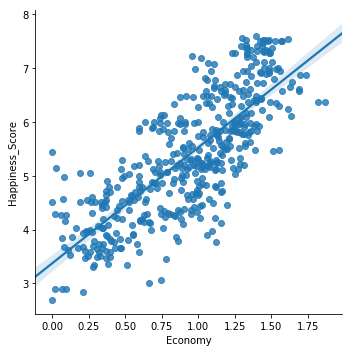

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x = "Economy", y = "Happiness_Score", data = dropped_happy) 
plt.show()

#view relationship between happiness and economy 

In [58]:
lm2=LinearRegression()
lm2.fit(X[['Economy']], dropped_happy.Happiness_Score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
trace = go.Scatter(
    x = lm2.predict(X[['Economy']]),
    y = dropped_happy.Happiness_Score,
    mode = 'lines+markers'
)
data = [trace]
layout = go.Layout(
    title='Happiness Score vs. Predicted Happiness Score',
    xaxis=dict(
        title='Happiness Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Predicted Happiness Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [59]:
mseeconomy = np.mean((dropped_happy.Happiness_Score - lm2.predict(X[['Economy']])) **2)
print(mseeconomy)

#mse of economy as the only variable; outcome not as good as using the former model

0.49416424178543683
